# The Schelling model

The Schelling model demontrates how racial seggregation may occur in equilibrium, even though no citizen has particularly strong racist feelings. The model is from the seminal paper Schelling, T. (1971), "Dynamic Models of Segregation", *Journal of Mathematical Sociology*. It is very intuitive **and** widely cited. It also lends itself nicely to demonstrate Object Oriented Programming, which we will talk more about in the first part today.  
* [Thomas Schelling's paper](https://www.uzh.ch/cmsssl/suz/dam/jcr:00000000-68cb-72db-ffff-ffffff8071db/04.02%7B_%7Dschelling%7B_%7D71.pdf)

In [1]:
import schelling
import ConsumptionSaving as cs
%load_ext autoreload
%autoreload 2
from types import SimpleNamespace
from copy import copy
from scipy import optimize
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## Model background
* A lot of research since the 70s has gone into understanding the forces that drives segregation between ethnic groups.
* This goes especially in the US, where heavy segregeation mostly entails poor outcomes for ethnic minorities.
* "White flight" out of urban centres was a common observation in the 70s and 80s, both in the US and Europe.
* The question then quickly becomes, how much does racism factor into this trend?
* The Schelling model shows that even **weak preferences** for having similar type neighbors are enough to drive segregation. 

## Model outline  
**Agent-based** model
* The model is a simple **agent-based** model. 
* "Agent-based" means that the model is entirely defined by the behavior of individual agents. 
* There are no market clearing/equilibrium conditions imposed.
* The equilibrium must therefore emerge endogenously through a simulation.

**The city**
* The model represents a city or a landscape with $L$ locations and $N<L$ citizens.
* Locations are similarly sized squares, making the landscape like a chess board. 
* Each "location square" therefore has 8 neighbouring squares. (Unless it is on the edge of the landscape)

<img src="square.png" alt="Drawing" style="width: 200px;"/>  

**Citizens**
* A citizen can only occupy 1 square at a time.
* There are 2 groups of citizens: A and B.
* Both groups of citizens prefer, *to some degree*, having neighbours of the same group.
* A citizen may become **discontent and moves** from its current location. 
* This happens if the share of same-group neighbours fall below a cut-off threshold $\sigma$
* Consider the example below:
    * Citizens of group A are green and group B is blue.
    * Citizen $i$ in the middle square has 2 other A neighbours, 4 group B neighbours and 2 empty squares. 
    * The share of same type neighbours is thus $\frac{2}{2+4} = \frac{1}{3}$
    * If $\sigma > \frac{1}{3}$, then citizen $i$ decides to move.
    * When moving, citizen $i$ will choose a random location that was observed to be satisfactory in the previous period. (static expectations)

<img src="square_citizens.png" alt="Drawing" style="width: 200px;"/> 

**Model question**
* A what level of the preference threshold $\sigma$ will we get segregation? 


**Quiz:** What do you think?

## Running the model

* The simulation is implemented as an object that can be called.  
* The module `schelling` has 3 classes: `Simulation`, `Square` and `Citizen`
* Only need to create a `Simulation` object.

In [3]:
# Create simulation object and get default settings
sim = schelling.Simulation()
mp = sim.get_model_params()
display(mp) # The settings displayed here can be modified

namespace(n_dim=10,
          check_prints=False,
          cutoff=0.5,
          T=5,
          share_pop=0.8,
          share_A=0.5,
          share_B=0.5)

* `n_dim` is the number of squares along each dimension of the landscape (n_dim$^2$ squares in total).
* `cutoff` is the threshold $\sigma$.
* `T` is the number of simulation iterations.
* `share_pop` is the ration of citizens to squares.
* `share_A` and `share_B` is the share of each population group. 

Set up the simulation for default parameter values

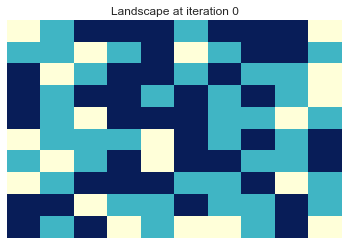

In [4]:
sim.setup_sim(mp)
sim.plot_state()

In the initial state of the model, citizens of both groups are randomly scattered over the landscape
* Type A citizens are azure blue
* Type B citizens are marine blue
* Empty squares are beige

Maybe we want a larger landscape with more citizens:

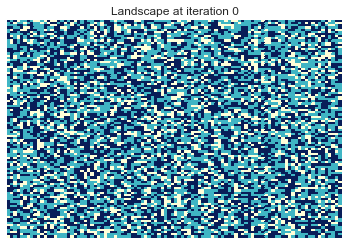

In [5]:
# Update parameters and simulation object
mp.n_dim = 100
sim.setup_sim(mp)
sim.plot_state()

Run the simulation $T$ periods and plot the state of the simulation again

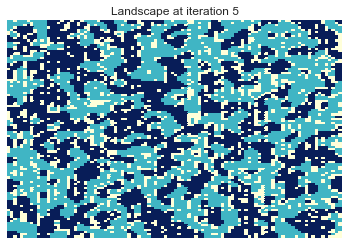

In [6]:
sim.run_sim()
sim.plot_state()

Obviously, the segregation happened quickly!

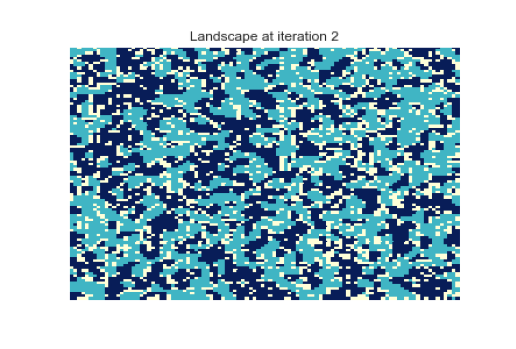

In [7]:
# See state at various iterations
sim.plot_state(2)

We can make a GIF of the development. Needs a stored image for each iteration. 

In [8]:
sim.make_gif()# See GIF in folder

Lets **experiment** a bit with the cutoff: 

In [9]:
mp.cutoff = 0.3
sim.setup_sim(mp)
sim.run_sim()
sim.plot_state()

## Code structure

The code is organized around object oriented programming principles. 
* The simulation is an object
* Each square is an object
* Each citizen is an object

**Key attributes of the model objects**
* *The simulation object:*
    * A list of references to all squares in the landscape
    * A list of references to all citizens
* *A square object:*
    * A list of references to all neighbouring squares
    * A reference to the citizen occupying the square (if any)
    * Number of group A and B neighbours
* *A citizen object:*
    * A reference to its current square   
  

### A quick refresher on objects and references
 
* Everything in Python is an object   
* Lists and assignments only contain **references** to the underlying objects.

Let's say we create the objects `a` and `b`. 

If we put those into `list1` and `list2`, then these lists only contain a **reference** to `a` and `b`.

So that if we update an element in `list1`, we **also** update `list2`, because their elements refer to the same underlying objects. 

See the diagram below:

<img src="references_diagram.png" alt="Drawing" style="width: 400px;"/> 

The code shows how to harness references for making a robust implementation!

### The model "algorithm"

Create simulation object, model parameter object and initialize simulation.   
**for** t = 1:T   
&emsp;fetch all discontent citizens   
&emsp;fetch all free squares that would make citizens of each group content   
&emsp;**for** `dc` in discontent_citizens:   
&emsp;&emsp;Fetch a new avaible, satisfactory square   
&emsp;&emsp;**for** all neighbors to `dc`'s current square   
&emsp;&emsp;&emsp;**-1** to counter of `dc.type` neighbours (A or B)   
&emsp;&emsp;**delete** references between current square and `dc` (moving away)   
&emsp;&emsp;**create** references between new square and `dc` (moving in)   
&emsp;&emsp;**for** all neighbors to new square   
&emsp;&emsp;&emsp;**+1** to counter of `dc.type` neighbours

**How does OOP help the implementation?**
* When a citizen considers moving into a new square, all necessary information is stored in that square.
* That is, the square has a reference to each neighbour, which in turn has a reference to the residing citizen.
* Thereby, through referencing each square "knows" its type of neighbours.
* Pro: references are very lightweight, so it does not cost a lot of memory that each square is referenced 8 times. 
* Pro: code becomes easy to interpret and easy to change. E.g. a square may get 2 surrounding rows of neighbours instead of 1 (let's try that). 
* Con: the simulation is running in pure Python. Not terribly fast. 

# Structural estimation and the consumption savings model

We have already encountered the canonical consumption-savings model back in L11 and in the problem set. 
 
* The great **benefit** of such a model is that it can be used to run **counter factual scenarios** based on economic policy.
* For example, we may want to know how people react to stimulus packages during covid. [An example of such an exercise](carroll_2020.pdf).
* But then we need the model to be **empirically relevant**!
* When we solved it, we just plugged in some parameters that seemed reasonable.
* That is not good enough for proper policy guidance.
* We need to estimate the core parameters from data.
* This is called **structural estimation**. 
* Structural estimation means that you impose behavioral structure (given by the model) on your data to get statistical predictions.
* In our current example, we impose that people are forward looking, optimizing and derive utility from choices in a certain way. 
* For more material, go to Jeppes repository [ConsumptionSavingNotebooks](https://github.com/NumEconCopenhagen/ConsumptionSavingNotebooks) and check out the links on [numeconcopenhagen](https://numeconcopenhagen.netlify.app/).

<font size="4">Quick refresher on the consumption savings model</font>   
A household lives for 2 periods and makes decisions on consumption and saving in each period.  

The problem of the household is **solved backwards**, since choices today affects the household's state tomorrow.

**Second period:**   
household gets utility from **consuming** and **leaving a bequest** (warm glow),

$$
\begin{aligned}
v_{2}(m_{2})&= \max_{c_{2}}\frac{c_{2}^{1-\rho}}{1-\rho}+\nu\frac{(a_2+\kappa)^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
a_2 &= m_2-c_2 \\
a_2 &\geq 0
\end{aligned}
$$

where
* $m_t$ is cash-on-hand 
* $c_t$ is consumption
* $a_t$ is end-of-period assets 
* $\rho > 1$ is the risk aversion coefficient
* $\nu > 0 $ is the strength of the bequest motive
* $\kappa > 0$ is the degree of luxuriousness in the bequest motive  
* $a_2\geq0$ ensures the household *cannot* die in debt

**First period:**   
the household gets utility from immediate consumption.  Household takes into account that next period income is stochastic.

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
a_1&=m_1-c_1\\
m_2&= (1+r)(m_1-c_1)+y_2 \\
y_{2}&= \begin{cases}
1-\Delta & \text{with prob. }0.5\\
1+\Delta & \text{with prob. }0.5 
\end{cases}\\
a_1&\geq0
\end{aligned}
$$

where
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $y_2$ is income in period 2
* $\Delta \in (0,1)$ is the level of income risk (mean-preserving)
* $r$ is the interest rate
* $a_1\geq0$ ensures the household *cannot* borrow

<font size="5">How are the parameters of such a model estimated?</font>

* We can use **Simulated Minimum Distance** (SMD), aka Simulated Method of Moments, aka matching on moments. 
* Yes, it is closely related to GMM.
* It is a Swiss-army knife of structural estimation, generally available. 
* Word on the street: *"if you can simulate it, you can estimate it"*
* Other structural models may be estimated by maximum likelihood (preferable when possible). 
* Today, we will only look at parameters estimates to get the intuition right. 
* Standard errors are for another day, see [here](https://github.com/NumEconCopenhagen/ConsumptionSavingNotebooks/blob/master/00.%20DynamicProgramming/04.%20Structural%20Estimation.ipynb) if you are interested. 

## Simulated Minimum Distance

**Outline**   
1. Define the set of parameters to be estimated, denoted $\theta$. We set $\theta = \rho$, the risk aversion. 
2. Define a set of moments from data that can identify $\theta$. (The tricksy part)
3. We will use 3 moments: mean consumption in period 1 and 2, and mean variance in consumption across periods.
4. These moments are calculated from an empirical data set.
5. We then simulate the model with trial values of $\rho$ until the moments from the simulated data is close to the empirical moments. 


**Definitions**

* We have individual observations on $N^d$ individuals over $T^d$ periods, denoted $w_i$.
* We assume that the empirical  data is generated by our model which is parameterized by $\theta_{dgp}$
* We define a moment generating function: 
    * $\Lambda = \frac{1}{N}\sum_{i=1}^N m(\theta|w_i)$
* As noted $\Lambda$, holds the mean of $c_1$, mean of $c_2$ and mean of $\text{var}(c_1,c_2)$
* Thus, the moments from data is given by 
    * $\Lambda_{data} = \frac{1}{N^d}\sum_{i=1}^{N^d} m(\theta_{dgp}|w_i)$
* Given the *guess* $\theta$ on the data generating parameter $\theta_{dgp}$, we can simulate the same set of moments from the model.
* Therefore, we simulate $N^s$ individuals over $T^s$ periods, and the outcome observation is denoted $w_s$
* The simulated set of moments are given by 
    * $\Lambda_{sim}(\theta) = \frac{1}{N_{sim}}\sum_{s=1}^{N_{sim}} m(\theta|w_s)$ 
* Finally, we define the function $g(\theta)$, which is the difference between data moments and simulation moments:
    * $g(\theta)=\Lambda_{data}-\Lambda_{sim}(\theta)$

**Simulated Minimum Distance (SMD)** estimator is then given by

$$
\hat{\theta} = \arg\min_{\theta} g(\theta)'Wg(\theta)
$$

where $W$ is a **weighting matrix**. $W$ is $J \times J$, where $J$ is the number of moments. The relative size of elements in $W$ determines the importance of the corresponding moments.   
One can derive an optimal $W$, but in practice, the Identity matrix often works well. So in our case:
$$ 
\begin{aligned}
W = 
\begin{bmatrix} 
1 & 0 & 0 \\ 
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix} 
\end{aligned}
$$


### Estimating our model

Firstly, the consumption savings model of Lecture 11 has been moved into the class `ConsumptionSavingModel` in the module ConsumptionSaving.    

Based on a set of "true" parameters we simulate the model for $N^d$ individuals. The outcome is our "empirical" data set.  

We therefore know exactly what our estimation should lead to. This is an **important exercise** whenever you do structural estimation. Test if you can estimate on synthetical data.  

The "true" data generating parameters.

In [10]:
par_dgp = SimpleNamespace()
par_dgp.rho = 8
par_dgp.kappa = 0.5
par_dgp.nu = 0.1
par_dgp.r = 0.04
par_dgp.beta = 0.94
par_dgp.Delta = 0.5

Create a model object based on true parameters and solve it:

In [11]:
true_model = cs.ConsumptionSavingModel(par_dgp)
m1,c1,m2,c2 = true_model.solve()

Visualize the solution just to be sure that it looks right

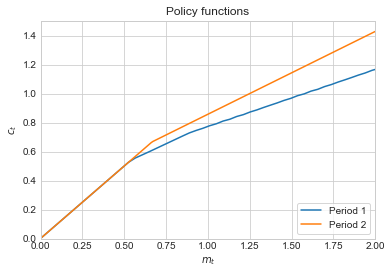

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(m1,c1, label=f'Period {1}')
ax.plot(m2,c2, label=f'Period {2}')
ax.legend(loc='lower right',facecolor='white',frameon=True)
ax.set_xlabel('$m_t$')
ax.set_ylabel('$c_t$')
ax.set_title('Policy functions')
ax.set_xlim([0,2])
ax.set_ylim([0,1.5]);

Based on the solution, we can create a distribution of initial cash-on-hand, $m_1$, and simulate the following consumption savings paths 

In [13]:
# Simulate a data set based on the true model
simN = 100_000
true_model.sim_m1 = np.fmax(np.random.normal(1,0.1,size=simN), 0) #np.fmax: One cannot have negative m
data_c1, data_c2 = true_model.simulate() # Simulate choices based on initial m

We also need to set up a model for estimation.   
We want to estimate $\rho$. This info is provided as an attribute to the model.

In [14]:
# Create model object for estimation
par = copy(par_dgp)
est_model = cs.ConsumptionSavingModel(par)
est_model.theta_name = 'rho'
est_model.sim_m1 = np.fmax(np.random.normal(1,0.1,size=simN),0)

The function $\Lambda = \frac{1}{N}\sum_{i=1}^N m(\theta|w_i)$ is called `moment_func()`

In [15]:
def moment_func(c1, c2):
    mom1 = c1.mean()
    mom2 = c2.mean()
    mom3 = np.var(np.stack((c1, c2)), axis=0).mean() # Averaging the variance of [c_1, c_2] over individuals
    return np.array([mom1, mom2, mom3])

The function $g(\theta)=\Lambda_{data}-\Lambda_{sim}(\theta)$ is called `moments_diff()`

In [16]:
def moments_diff(model, data_moms):
    sim_c1, sim_c2 = model.simulate() # sim_c1 and sim_c2 are arrays 
    sim_moms = moment_func(sim_c1, sim_c2) 
    return sim_moms - data_moms 

Our objective $g(\theta)'Wg(\theta)$ is in the function `obj_func()` 

In [17]:
def obj_func(theta, model, data_moms, W):
    setattr(model.par, model.theta_name, theta)
    diff = moments_diff(model, data_moms)
    obj = diff @ W @ diff
    return obj

We can now calculate data moments, $\Lambda_{data}$ and define $W$

In [18]:
data_moms = moment_func(data_c1, data_c2)
W = np.eye(len(data_moms))

print('Data moments\n', data_moms)
print('Weighting matrix\n',W)

Data moments
 [0.77185349 0.9934689  0.03279973]
Weighting matrix
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


We are now ready to estimate!   

**The estimation algorithm is as follows:**
1. Calculate data moments, define $W$ and initial guess at estimated parameter $\theta = \theta^{guess}_0$. Set stopping threshold $\epsilon > 0$.  
2. Solve the model.
3. Simulate moments from the solution.
4. Calculate the objective based on simulated moments.
5. Make a new guess $\theta^{guess}_1$ 
6. Perform 2.-4. based on $\theta^{guess}_1$ 
7. If the **change** in objective value from the two simulations is below $\epsilon$, then stop.  
    Otherwise reiterate 5.-7.

**Warning:** Estimation by simulation can be very time consuming.

Here we use **Nelder-Mead** as the objective function can be rugged, which it handles well.

In [19]:
# Estimation of rho
rho_guess = 6
res = optimize.minimize(obj_func, rho_guess, 
                            args=(est_model, data_moms, W), method='nelder-mead')

display(res)

 final_simplex: (array([[7.95029297],
       [7.95021973]]), array([1.53770217e-07, 1.28103808e-06]))
           fun: 1.5377021729637826e-07
       message: 'Optimization terminated successfully.'
          nfev: 45
           nit: 20
        status: 0
       success: True
             x: array([7.95029297])

In [20]:
print(f'rho_hat = {res.x[0]:1.4f}')

rho_hat = 7.9503


**Profile of the objective function**

In [21]:
npoints = 20
rhos = np.linspace(6.5, 9.5, npoints)
obj_vals = np.empty((npoints,))
for i,rho in enumerate(rhos):
    obj_vals[i] = obj_func(rho, est_model, data_moms, W)

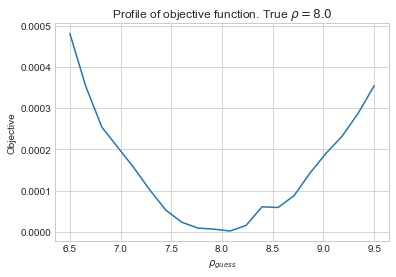

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(rhos,obj_vals)
ax.set_xlabel(r'$\rho_{guess}$')
ax.set_ylabel('Objective')
ax.set_title(r'Profile of objective function. True $\rho = 8.0$')
plt.show()